In [426]:
import pandas as pd
from top2vec import Top2Vec
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from src.data_wrangling.load_data import load_political_quotes

# Load quotations for each of the predefined topics

In [427]:
topics_path = 'data/topics/'
topics_file_names = ['immigration_quotes', 'europe_quotes', 'discrimination_quotes',
                     'russia_quotes', 'covid_quotes', 'terrorism_quotes', 'climate_change_quotes', 'israeli_palestinian_quotes']
topics  = ['Immigration', 'Europe and Brexit', 'Discrimination',
           'Russia', 'Covid', 'Terrorism', 'Climate change', 'Israeli palestinian']

raw_quotes = pd.DataFrame()

for file_name, topic in zip(topics_file_names, topics):
    topic_df = pd.read_csv(topics_path + file_name, index_col=0).reset_index(drop=True)
    topic_df['topic'] = topic
    raw_quotes = pd.concat([raw_quotes, topic_df], ignore_index=True)
raw_quotes

,quotation,speaker,country,political_alignment,date,political_party,topic
0,the boats must be stopped from departing,Matteo Renzi,Italy,centre-left,2015-04-20 01:49:57,Democratic Party,Immigration
1,noticeably reduce the number of refugees.,Angela Merkel,Germany,centre-right,2015-12-19 19:29:48,Christian Democratic Union,Immigration
2,Even if the influx of refugees slows down duri...,Donald Tusk,Poland,centrism,2015-10-15 06:21:30,Civic Platform,Immigration
3,I would expect positive growth in 2015 but thi...,Pier Carlo Padoan,Italy,centre-left,2015-03-15 16:22:01,Democratic Party,Immigration
4,The existing list of secure countries of origi...,Andreas Bausewein,Germany,centre-left,2015-08-31 05:00:00,Social Democratic Party of Germany,Immigration
...,...,...,...,...,...,...,...
30316,propped up by structural inequalities with Pal...,David Sassoli,Italy,centre-left,2020-01-15 15:22:24,Democratic Party,Israeli palestinian
30317,such outrageous acts of terror,Miguel Ángel Moratinos,Spain,centre-left,2020-03-26 13:57:51,Spanish Socialist Workers' Party,Israeli palestinian
30318,The EU reaffirms its readiness to work towards...,Josep Borrell,Spain,centre-left,2020-01-28 23:04:04,Spanish Socialist Workers' Party,Israeli palestinian
30319,we haven't seen a similar situation in the 70 ...,Angela Merkel,Germany,centre-right,2020-03-18 18:00:31,Christian Democratic Union,Israeli palestinian


# Determine what the right parties in each country are

We have decided to compare the right-hand parties because there is a clear distinction between countries and
it would be interesting to let the data show that. If we were to consider quotes from centered-parties it could be harder
to draw that distinction.

In [428]:
# right_political_orientations = ['centre-right', 'right-wing','far-right']
# countries = raw_quotes['country'].unique()
countries = ['Germany', 'France', 'Italy', 'Poland']
quotes = raw_quotes[raw_quotes.country.isin(countries) & (raw_quotes.political_alignment == 'right-wing')].reset_index(drop=True)
quotes

,quotation,speaker,country,political_alignment,date,political_party,topic
0,They don't tell you this but the immigration s...,Marine Le Pen,France,right-wing,2015-09-05 07:01:00,National Rally,Immigration
1,who have exploited the desperation of refugees...,Marine Le Pen,France,right-wing,2015-09-18 03:49:50,National Rally,Immigration
2,It's plain to see what going on with the extre...,Bernard Monot,France,right-wing,2015-09-05 18:14:49,National Rally,Immigration
3,Our state must be able to decide over the cont...,Marine Le Pen,France,right-wing,2015-01-16 18:07:25,National Rally,Immigration
4,Tolerance? What does that mean? I am a very to...,Jean-Marie Le Pen,France,right-wing,2015-04-12 00:26:34,National Rally,Immigration
...,...,...,...,...,...,...,...
1912,It will be supporting... the European Coalitio...,Joachim Brudziński,Poland,right-wing,2019-05-26 05:05:47,Law and Justice,Israeli palestinian
1913,"Fundamentally, ecology is about people living ...",Hervé Juvin,France,right-wing,2019-10-17 16:16:49,National Rally,Israeli palestinian
1914,Long live a Europe of sovereign nations.,Marine Le Pen,France,right-wing,2019-04-25 00:00:00,National Rally,Israeli palestinian
1915,We received official explanations from the Isr...,Krzysztof Szczerski,Poland,right-wing,2019-02-17 14:48:12,Law and Justice,Israeli palestinian


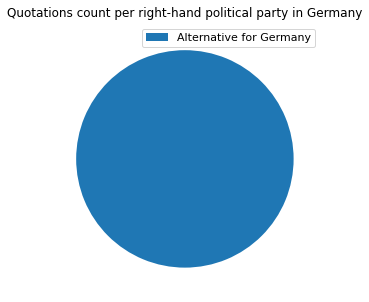

In [429]:
country_parties = quotes[quotes.country == 'Germany'].groupby('political_party').size()
plot = country_parties.plot.pie(ylabel='', figsize=(5, 5), legend=True, title='Quotations count per right-hand political party in Germany', labels=None)

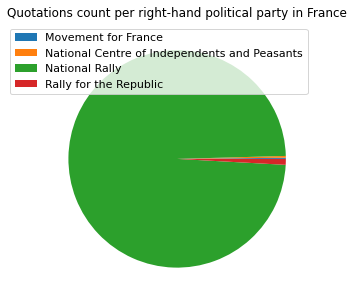

In [430]:
country_parties = quotes[quotes.country == 'France'].groupby('political_party').size()
plot = country_parties.plot.pie(ylabel='', figsize=(5, 5), legend=True, title='Quotations count per right-hand political party in France', labels=None)

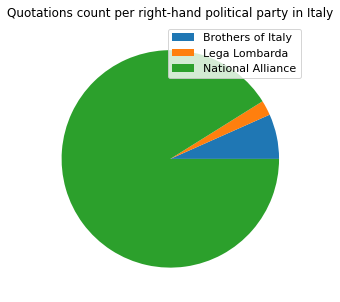

In [431]:
country_parties = quotes[quotes.country == 'Italy'].groupby('political_party').size()
plot = country_parties.plot.pie(ylabel='', figsize=(5, 5), legend=True, title='Quotations count per right-hand political party in Italy', labels=None)

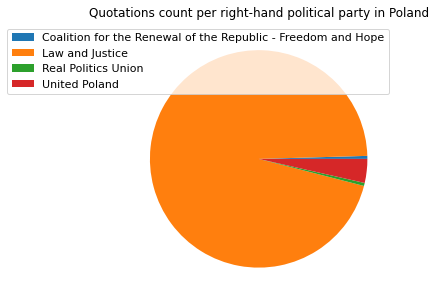

In [432]:
country_parties = quotes[quotes.country == 'Poland'].groupby('political_party').size()
plot = country_parties.plot.pie(ylabel='', figsize=(5, 5), legend=True, title='Quotations count per right-hand political party in Poland', labels=None)

# Filter quotations from politicians from AfD (Germany), Lega Nord (Italy), Front National (France), PiS(Poland)

These are the right-hand parties with the most quotations within each country providing more
data to analyse.

In [433]:
political_parties = ['Alternative for Germany', 'Lega Nord', 'National Rally', 'Law and Justice']
quotes = raw_quotes[raw_quotes.political_party.isin(political_parties)].reset_index(drop=True)
quotes.loc[:, 'country_political_party'] =  quotes['country'] + ' - ' + quotes['political_party']
quotes

,quotation,speaker,country,political_alignment,date,political_party,topic,country_political_party
0,I'm the regional president and I decided wheth...,Roberto Maroni,Italy,far-right,2015-06-08 15:23:20,Lega Nord,Immigration,Italy - Lega Nord
1,I would use the ships to defend our borders. You?,Matteo Salvini,Italy,far-right,2015-04-11 16:04:45,Lega Nord,Immigration,Italy - Lega Nord
2,They don't tell you this but the immigration s...,Marine Le Pen,France,right-wing,2015-09-05 07:01:00,National Rally,Immigration,France - National Rally
3,who have exploited the desperation of refugees...,Marine Le Pen,France,right-wing,2015-09-18 03:49:50,National Rally,Immigration,France - National Rally
4,It's plain to see what going on with the extre...,Bernard Monot,France,right-wing,2015-09-05 18:14:49,National Rally,Immigration,France - National Rally
...,...,...,...,...,...,...,...,...
3386,one of the most dangerous and pitiless men in ...,Matteo Salvini,Italy,far-right,2020-01-03 00:00:00,Lega Nord,Israeli palestinian,Italy - Lega Nord
3387,Most importantly it is connected to the fact t...,Matteo Salvini,Italy,far-right,2020-01-20 15:51:44,Lega Nord,Israeli palestinian,Italy - Lega Nord
3388,I spent nine years at the European Parliament ...,Matteo Salvini,Italy,far-right,2020-01-20 06:07:00,Lega Nord,Israeli palestinian,Italy - Lega Nord
3389,"There is, of course, antisemitism of small pol...",Matteo Salvini,Italy,far-right,2020-01-20 15:51:44,Lega Nord,Israeli palestinian,Italy - Lega Nord


# Contrast the opinions of these parties

In [434]:
from src.sentiment_analysis import get_subjectivity, get_polarity, get_sentiment
# Generate the sentiment and sensitivity value of each of the quotes
quotes['polarity'] = quotes.quotation.apply(lambda x: get_polarity(x))
quotes['subjectivity'] = quotes.quotation.apply(lambda x: get_subjectivity(x))
quotes['sentiment'] = quotes['polarity'].apply(lambda x : get_sentiment(x))
quotes[['quotation', 'polarity', 'subjectivity', 'sentiment']]

,quotation,polarity,subjectivity,sentiment
0,I'm the regional president and I decided wheth...,0.000000,0.000000,Neutral
1,I would use the ships to defend our borders. You?,0.000000,0.000000,Neutral
2,They don't tell you this but the immigration s...,0.000000,0.750000,Neutral
3,who have exploited the desperation of refugees...,0.000000,0.000000,Neutral
4,It's plain to see what going on with the extre...,-0.184524,0.571429,Negative
...,...,...,...,...
3386,one of the most dangerous and pitiless men in ...,-0.050000,0.700000,Negative
3387,Most importantly it is connected to the fact t...,0.033333,0.800000,Positive
3388,I spent nine years at the European Parliament ...,-0.025189,0.175758,Negative
3389,"There is, of course, antisemitism of small pol...",-0.125000,0.250000,Negative


In [435]:
import seaborn as sns
from datetime import datetime, timedelta
def plot_quote_cnt_by_topic(quotes, topic):
    quotes = quotes[quotes.topic == topic]
    parties_quotes = quotes.groupby(['political_party', 'sentiment']).size().reset_index().set_index('political_party')
    # sentiment_quotes = df.groupby(['bucket_date', 'sentiment']).size().reset_index().set_index('bucket_date')
    parties_quotes.rename(columns={0: 'count'}, inplace=True)
    parties_quotes = parties_quotes.pivot_table(values='count', index=parties_quotes.index, columns='sentiment', aggfunc='first', fill_value=0)
    # print(parties_quotes)
    parties_quotes.plot.bar(stacked=True, figsize=(10, 5), title='%s - Number of quotes over political party' % topic,
                            xlabel='Political party', ylabel='Count', rot=0)

# def plot_quote_cnt_by_topic_old(df, topic):
#     plt_1 = plt.figure(figsize=(10, 5))
#     ax = sns.countplot(x="country_political_party", data=quotes[quotes.topic == topic])
#     plt.xlabel('Political party')
#     plt.suptitle('%s - Number of quotes over political party' % topic)
# plot_quote_cnt_by_topic_old(quotes, 'Immigration')
# plot_quote_cnt_by_topic(quotes, 'Immigration')

def show_time_distribution(df, topic_name,  country):
    df = df[(df.topic == topic_name) & (df.country == country)]
    dates = pd.to_datetime(df['date'])
    df['bucket_date'] = dates.apply(lambda x: datetime(x.year, (((x.month - 1) // 3) * 3) + 1, 1))
    sentiment_quotes = df.groupby(['bucket_date', 'sentiment']).size().reset_index().set_index('bucket_date')
    sentiment_quotes.rename(columns={0: 'count'}, inplace=True)
    sentiment_quotes = sentiment_quotes.pivot_table(values='count', index=sentiment_quotes.index, columns='sentiment', aggfunc='first', fill_value=0)
    sentiment_quotes.index = sentiment_quotes.index.to_series().dt.strftime('%Y-%b')
    sentiment_quotes.plot.bar(stacked=True, figsize=(20, 5), title='%s - Distribution of quotes over time in %s' % (topic_name, country), xlabel='Year - months', rot=0)

    # date_range = pd.date_range('2015-01-01', '2020-04-01',
    #                        freq='MS').strftime("%Y-%b")


## Climate change

### Distribution of number of quotes per party (all countries)

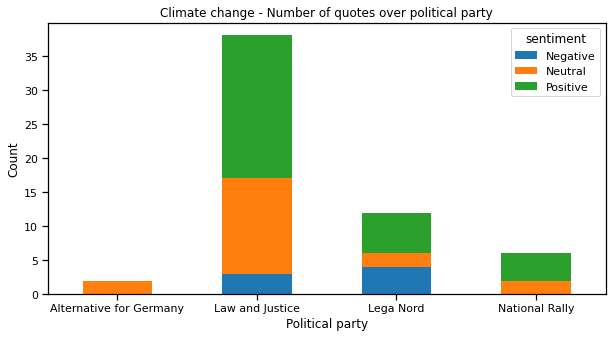

In [436]:
plot_quote_cnt_by_topic(quotes, 'Climate change')

### Distribution of sentiments within each party over time (per each country)
Plot with the count of neutral, positive and negative quotes on top of each other, normalise dividing by the largest
element so that plots of different countries are comparable.

#### Poland

C:\Users\alexi\AppData\Local\Temp/ipykernel_20624/808219894.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bucket_date'] = dates.apply(lambda x: datetime(x.year, (((x.month - 1) // 3) * 3) + 1, 1))


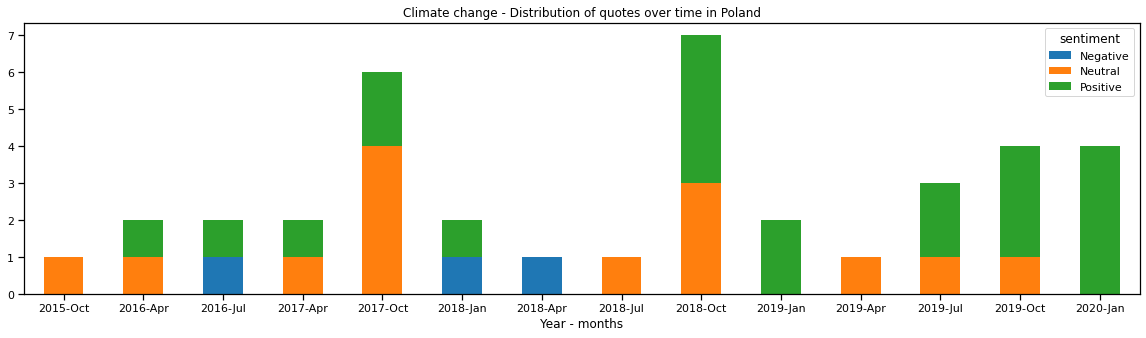

In [437]:
show_time_distribution(quotes, 'Climate change', country='Poland')

#### France

C:\Users\alexi\AppData\Local\Temp/ipykernel_20624/808219894.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bucket_date'] = dates.apply(lambda x: datetime(x.year, (((x.month - 1) // 3) * 3) + 1, 1))


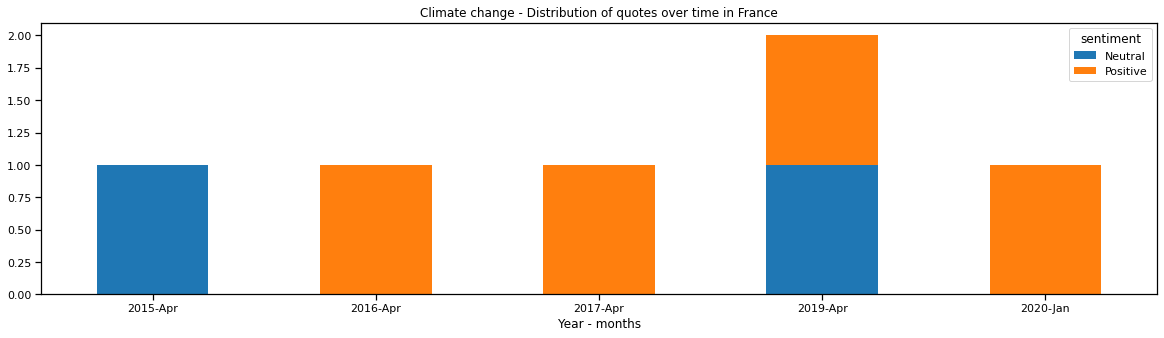

In [438]:
show_time_distribution(quotes, 'Climate change', country='France')

#### Italy

C:\Users\alexi\AppData\Local\Temp/ipykernel_20624/808219894.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bucket_date'] = dates.apply(lambda x: datetime(x.year, (((x.month - 1) // 3) * 3) + 1, 1))


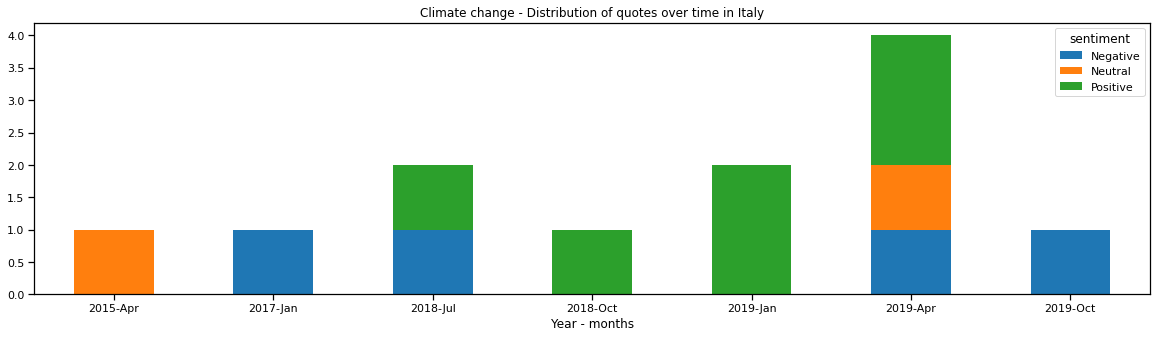

In [439]:
show_time_distribution(quotes, 'Climate change', country='Italy')

#### Germany

C:\Users\alexi\AppData\Local\Temp/ipykernel_20624/808219894.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bucket_date'] = dates.apply(lambda x: datetime(x.year, (((x.month - 1) // 3) * 3) + 1, 1))


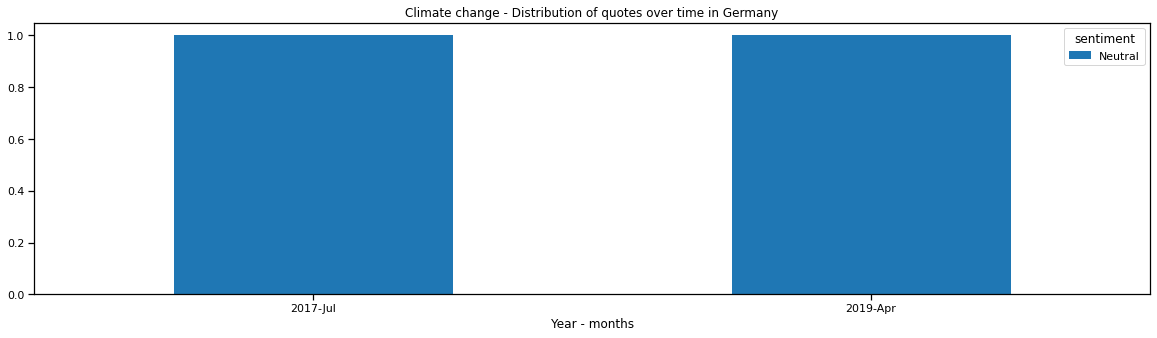

In [440]:
show_time_distribution(quotes, 'Climate change', country='Germany')


Plot the number of opinions in each of these parties per topic

## Immigration

### Distribution of number of quotes per party (all countries)

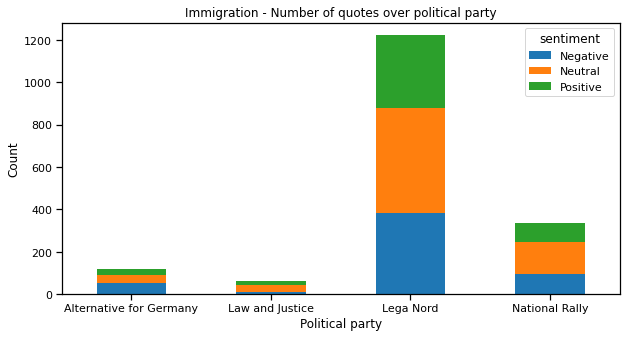

In [441]:
plot_quote_cnt_by_topic(quotes, 'Immigration')

### Distribution of sentiments within each party over time (per each country)

#### Poland

C:\Users\alexi\AppData\Local\Temp/ipykernel_20624/808219894.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bucket_date'] = dates.apply(lambda x: datetime(x.year, (((x.month - 1) // 3) * 3) + 1, 1))


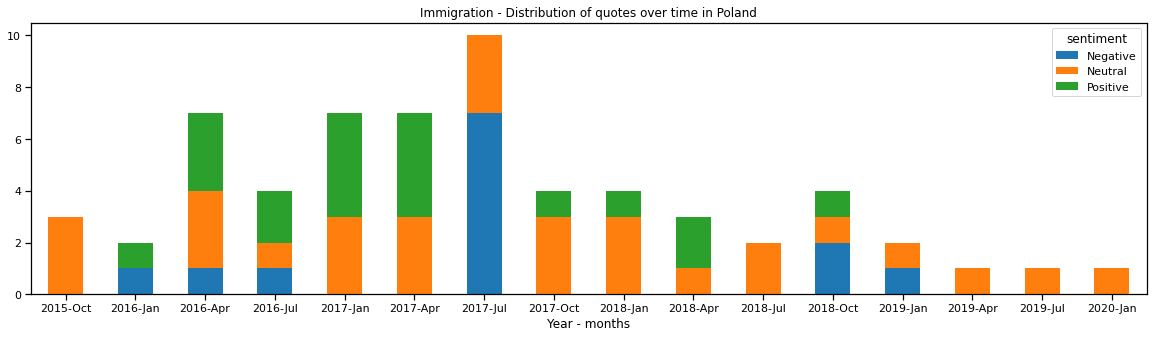

In [442]:
show_time_distribution(quotes, 'Immigration', country='Poland')

#### France

C:\Users\alexi\AppData\Local\Temp/ipykernel_20624/808219894.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bucket_date'] = dates.apply(lambda x: datetime(x.year, (((x.month - 1) // 3) * 3) + 1, 1))


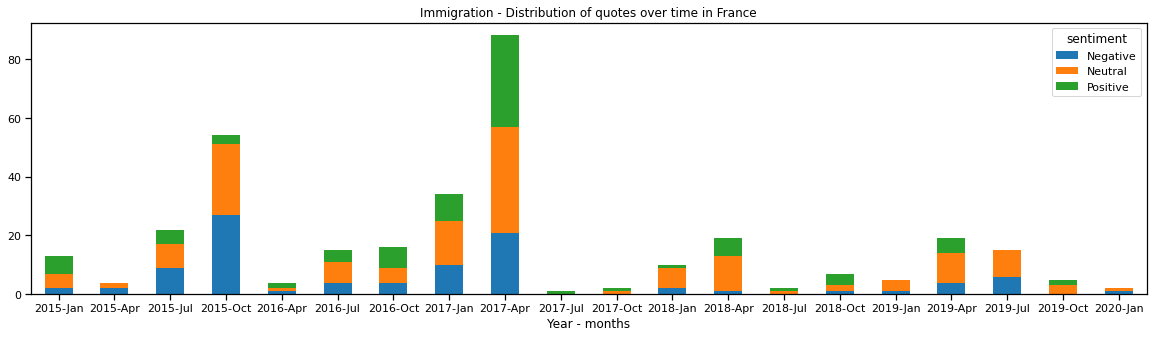

In [443]:
show_time_distribution(quotes, 'Immigration', country='France')

#### Italy

C:\Users\alexi\AppData\Local\Temp/ipykernel_20624/808219894.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bucket_date'] = dates.apply(lambda x: datetime(x.year, (((x.month - 1) // 3) * 3) + 1, 1))


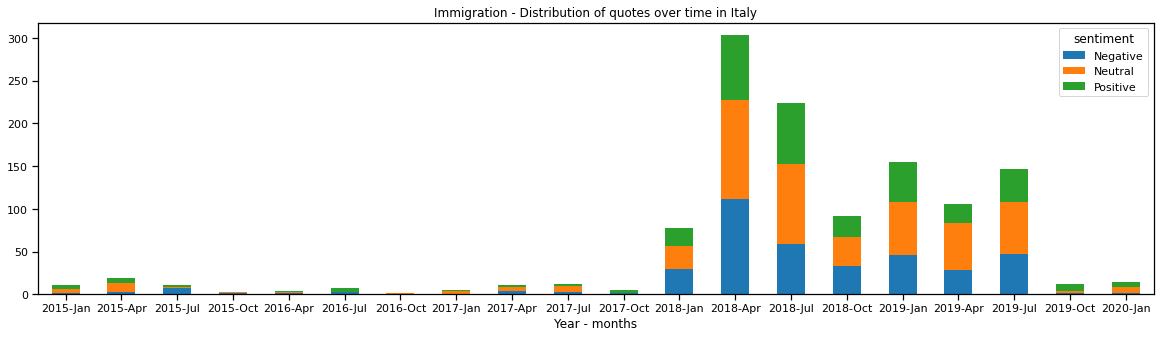

In [444]:
show_time_distribution(quotes, 'Immigration', country='Italy')

#### Germany

C:\Users\alexi\AppData\Local\Temp/ipykernel_20624/808219894.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bucket_date'] = dates.apply(lambda x: datetime(x.year, (((x.month - 1) // 3) * 3) + 1, 1))


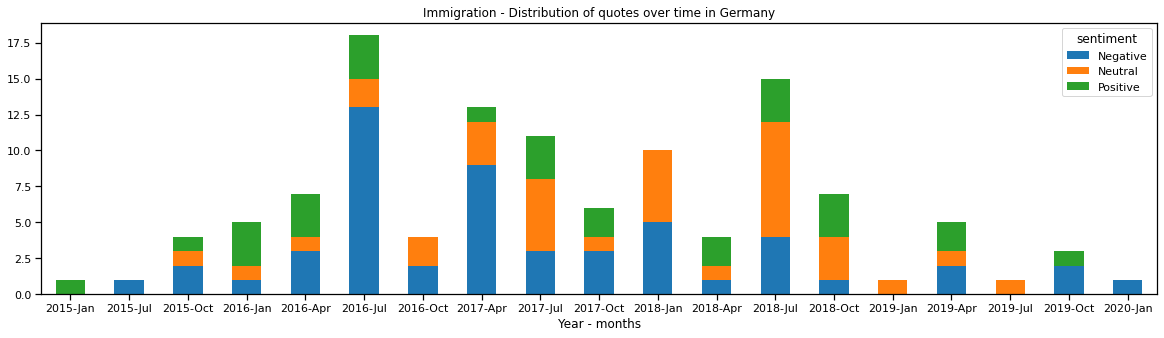

In [445]:
show_time_distribution(quotes, 'Immigration', country='Germany')


## Europe and Brexit

### Distribution of number of quotes per party (all countries)

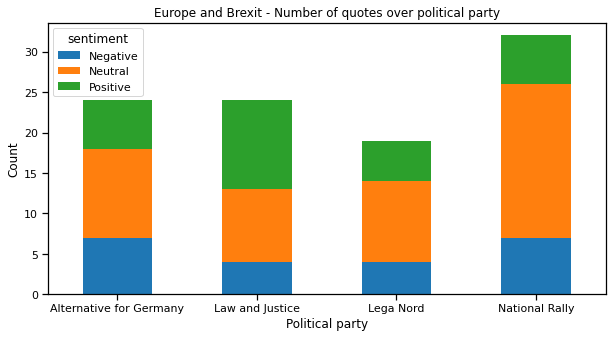

In [446]:
plot_quote_cnt_by_topic(quotes, 'Europe and Brexit')

### Distribution of sentiments within each party over time (per each country)

#### Poland

C:\Users\alexi\AppData\Local\Temp/ipykernel_20624/808219894.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bucket_date'] = dates.apply(lambda x: datetime(x.year, (((x.month - 1) // 3) * 3) + 1, 1))


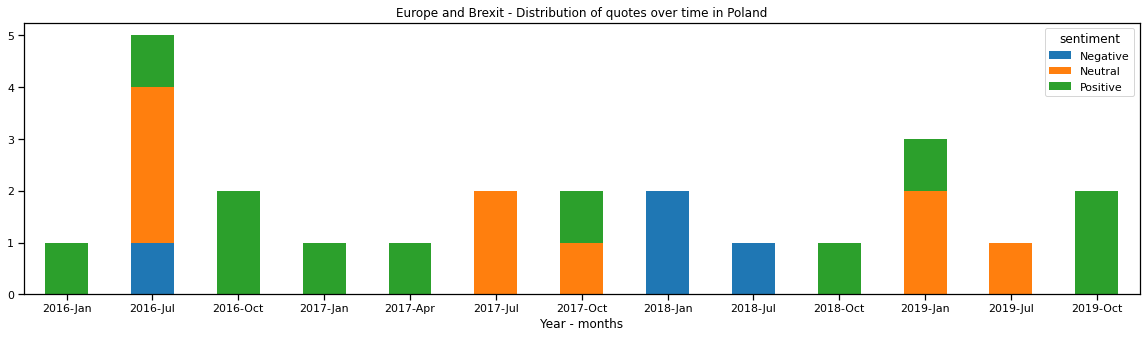

In [447]:
show_time_distribution(quotes, 'Europe and Brexit', country='Poland')

#### France

C:\Users\alexi\AppData\Local\Temp/ipykernel_20624/808219894.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bucket_date'] = dates.apply(lambda x: datetime(x.year, (((x.month - 1) // 3) * 3) + 1, 1))


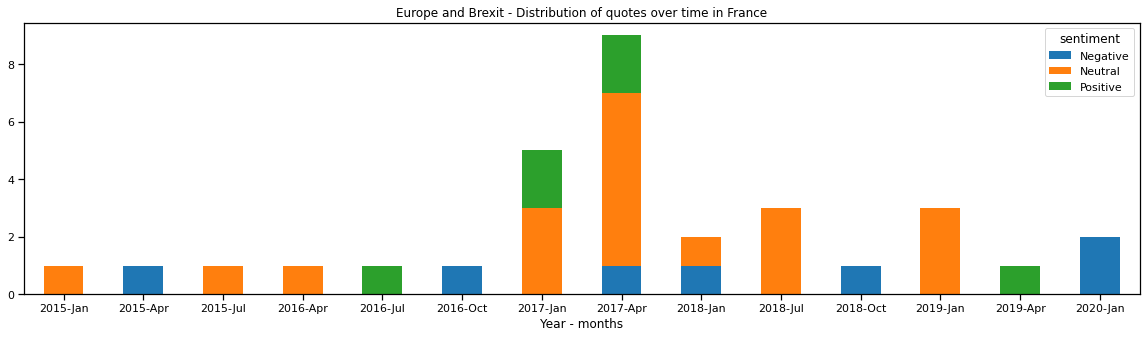

In [448]:
show_time_distribution(quotes, 'Europe and Brexit', country='France')

#### Italy

C:\Users\alexi\AppData\Local\Temp/ipykernel_20624/808219894.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bucket_date'] = dates.apply(lambda x: datetime(x.year, (((x.month - 1) // 3) * 3) + 1, 1))


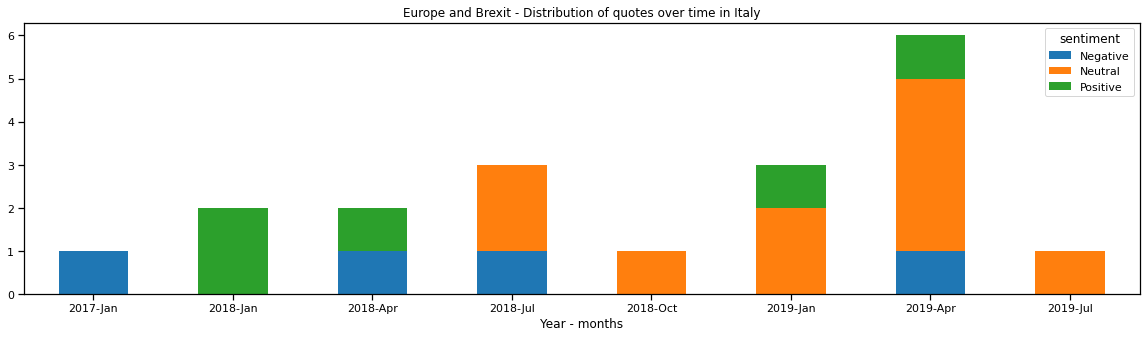

In [449]:
show_time_distribution(quotes, 'Europe and Brexit', country='Italy')

#### Germany

C:\Users\alexi\AppData\Local\Temp/ipykernel_20624/808219894.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bucket_date'] = dates.apply(lambda x: datetime(x.year, (((x.month - 1) // 3) * 3) + 1, 1))


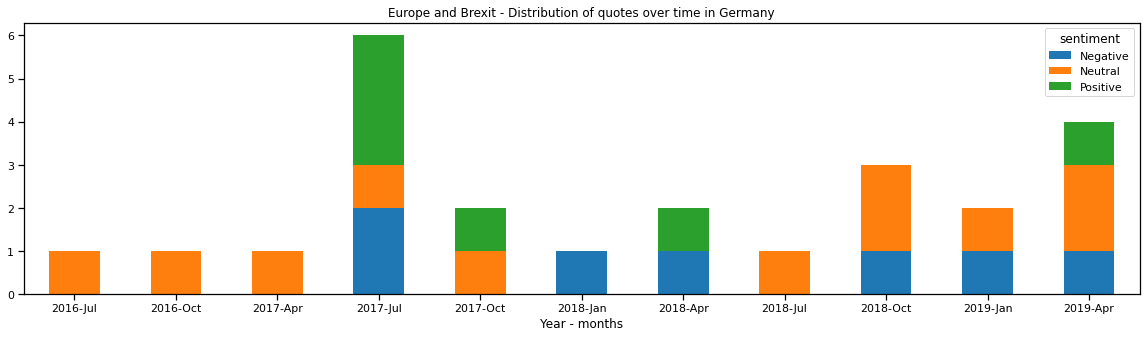

In [450]:
show_time_distribution(quotes, 'Europe and Brexit', country='Germany')

## Discrimination

### Distribution of number of quotes per party (all countries)

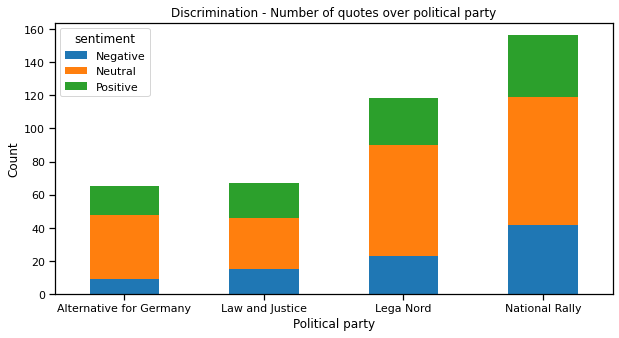

In [451]:
plot_quote_cnt_by_topic(quotes, 'Discrimination')

### Distribution of sentiments within each party over time (per each country)

#### Poland

C:\Users\alexi\AppData\Local\Temp/ipykernel_20624/808219894.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bucket_date'] = dates.apply(lambda x: datetime(x.year, (((x.month - 1) // 3) * 3) + 1, 1))


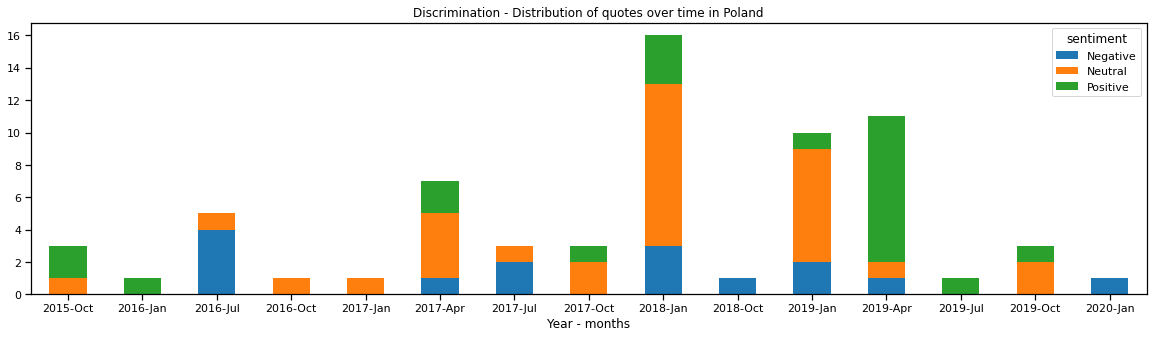

In [452]:
show_time_distribution(quotes, 'Discrimination', country='Poland')

#### France

C:\Users\alexi\AppData\Local\Temp/ipykernel_20624/808219894.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bucket_date'] = dates.apply(lambda x: datetime(x.year, (((x.month - 1) // 3) * 3) + 1, 1))


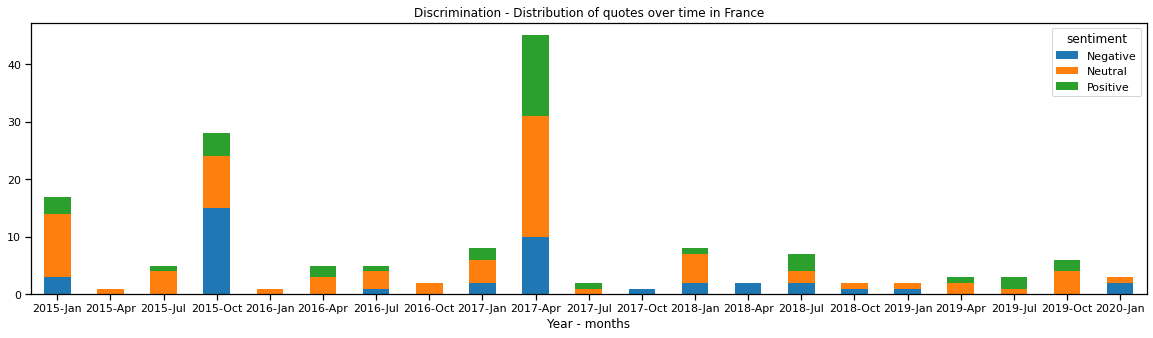

In [453]:
show_time_distribution(quotes, 'Discrimination', country='France')

#### Italy

C:\Users\alexi\AppData\Local\Temp/ipykernel_20624/808219894.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bucket_date'] = dates.apply(lambda x: datetime(x.year, (((x.month - 1) // 3) * 3) + 1, 1))


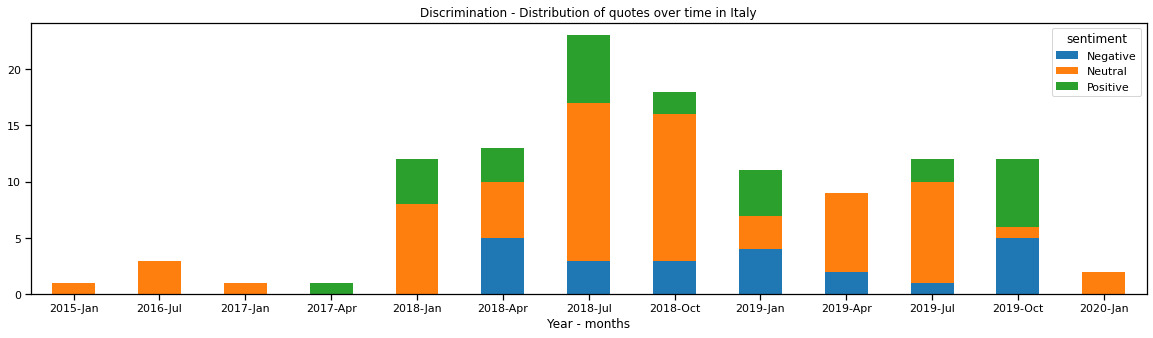

In [454]:
show_time_distribution(quotes, 'Discrimination', country='Italy')

#### Germany

C:\Users\alexi\AppData\Local\Temp/ipykernel_20624/808219894.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bucket_date'] = dates.apply(lambda x: datetime(x.year, (((x.month - 1) // 3) * 3) + 1, 1))


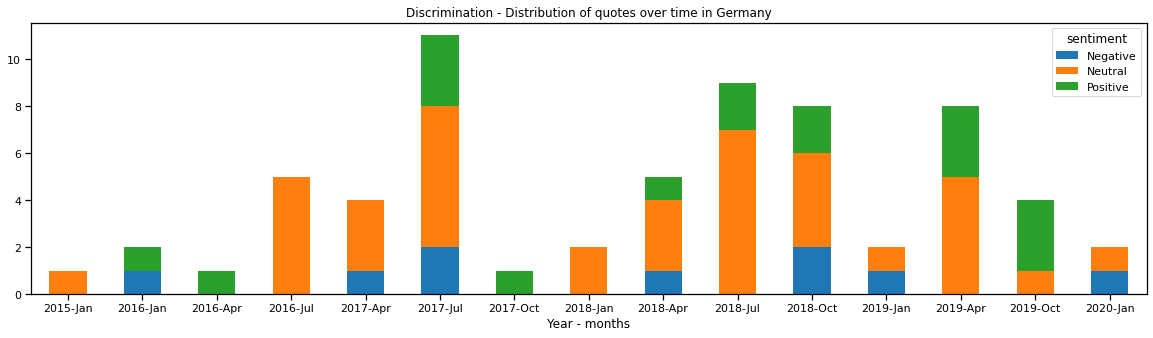

In [455]:
show_time_distribution(quotes, 'Discrimination', country='Germany')

## Russia

### Distribution of number of quotes per party (all countries)

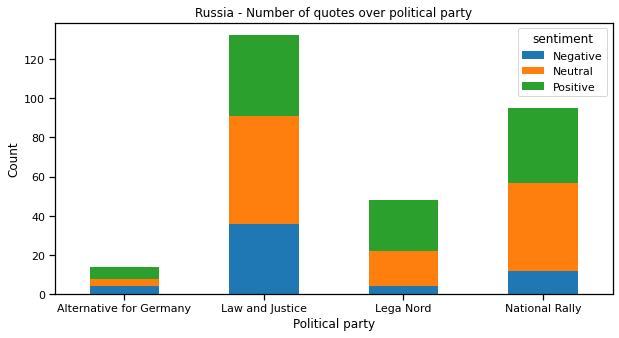

In [456]:
plot_quote_cnt_by_topic(quotes, 'Russia')

### Distribution of sentiments within each party over time (per each country)

#### Poland

C:\Users\alexi\AppData\Local\Temp/ipykernel_20624/808219894.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bucket_date'] = dates.apply(lambda x: datetime(x.year, (((x.month - 1) // 3) * 3) + 1, 1))


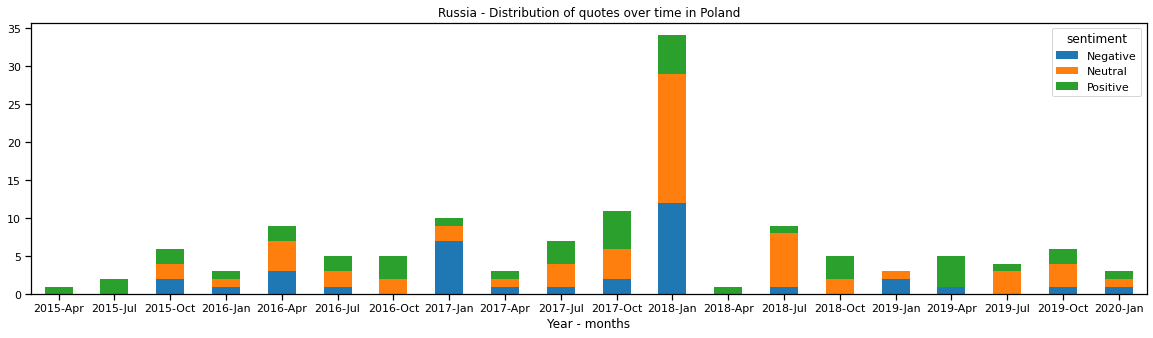

In [457]:
show_time_distribution(quotes, 'Russia', country='Poland')

#### France

C:\Users\alexi\AppData\Local\Temp/ipykernel_20624/808219894.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bucket_date'] = dates.apply(lambda x: datetime(x.year, (((x.month - 1) // 3) * 3) + 1, 1))


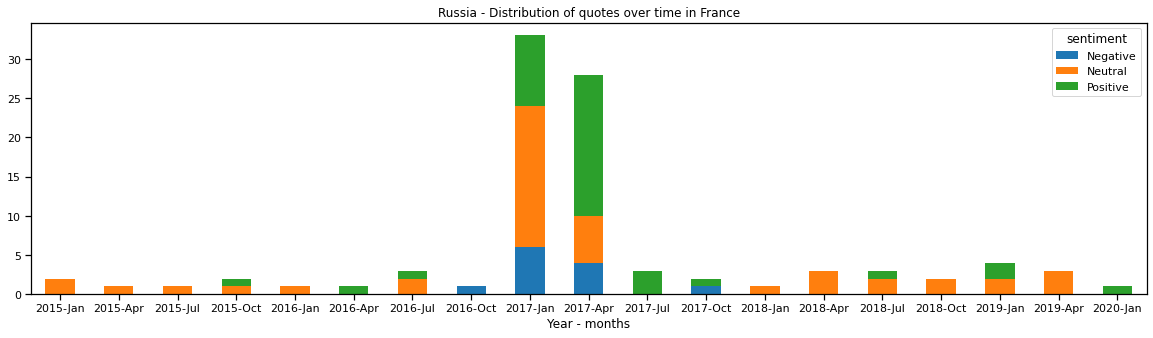

In [458]:
show_time_distribution(quotes, 'Russia', country='France')

#### Italy

C:\Users\alexi\AppData\Local\Temp/ipykernel_20624/808219894.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bucket_date'] = dates.apply(lambda x: datetime(x.year, (((x.month - 1) // 3) * 3) + 1, 1))


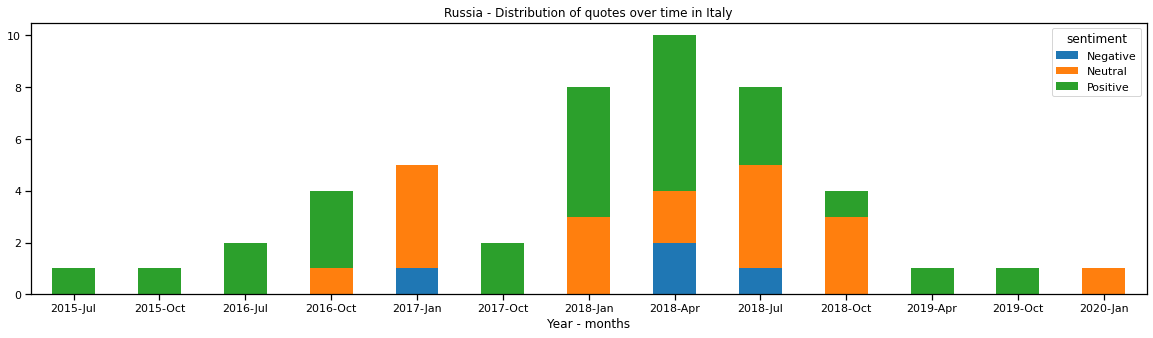

In [459]:
show_time_distribution(quotes, 'Russia', country='Italy')

#### Germany

C:\Users\alexi\AppData\Local\Temp/ipykernel_20624/808219894.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bucket_date'] = dates.apply(lambda x: datetime(x.year, (((x.month - 1) // 3) * 3) + 1, 1))


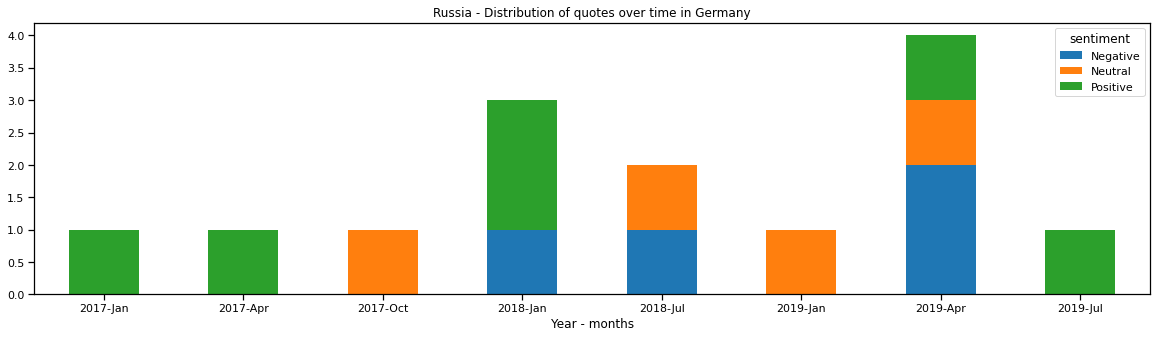

In [460]:
show_time_distribution(quotes, 'Russia', country='Germany')

## Covid

### Distribution of number of quotes per party (all countries)

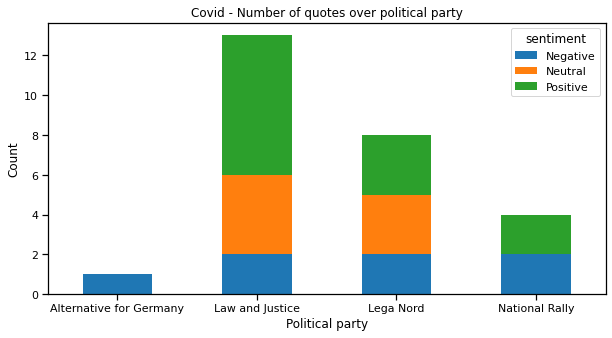

In [461]:
plot_quote_cnt_by_topic(quotes, 'Covid')

### Distribution of sentiments within each party over time (per each country)

#### Poland

C:\Users\alexi\AppData\Local\Temp/ipykernel_20624/808219894.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bucket_date'] = dates.apply(lambda x: datetime(x.year, (((x.month - 1) // 3) * 3) + 1, 1))


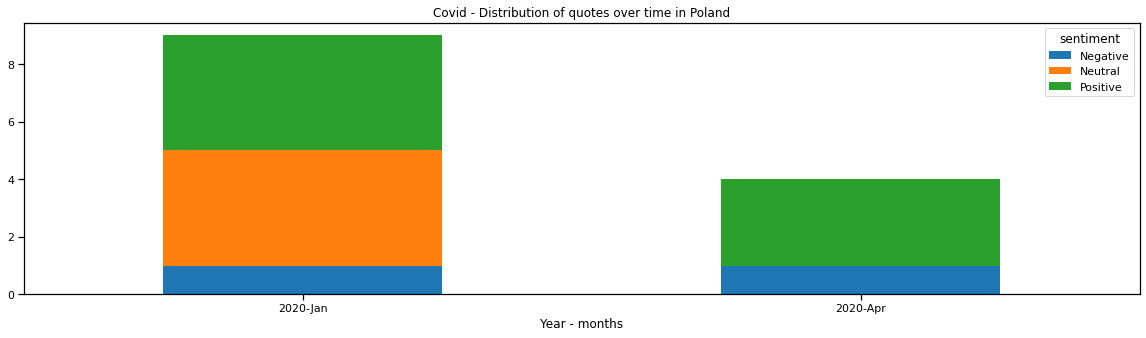

In [462]:
show_time_distribution(quotes, 'Covid', country='Poland')

#### France

C:\Users\alexi\AppData\Local\Temp/ipykernel_20624/808219894.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bucket_date'] = dates.apply(lambda x: datetime(x.year, (((x.month - 1) // 3) * 3) + 1, 1))


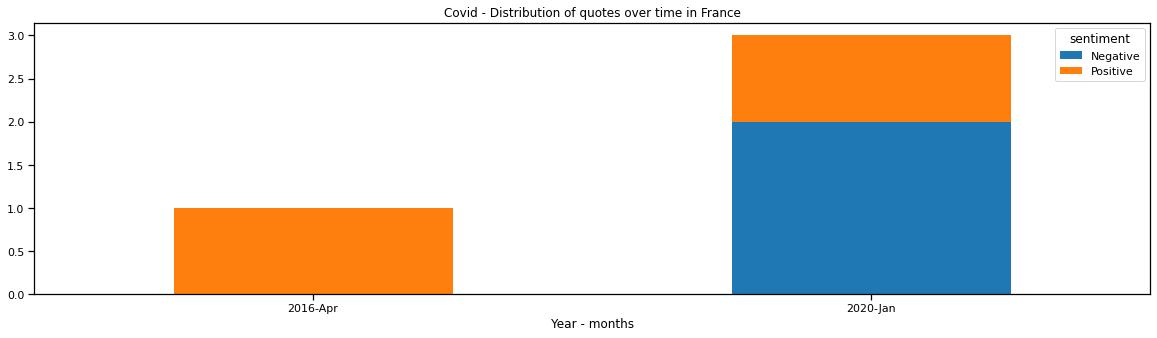

In [463]:
show_time_distribution(quotes, 'Covid', country='France')

#### Italy

C:\Users\alexi\AppData\Local\Temp/ipykernel_20624/808219894.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bucket_date'] = dates.apply(lambda x: datetime(x.year, (((x.month - 1) // 3) * 3) + 1, 1))


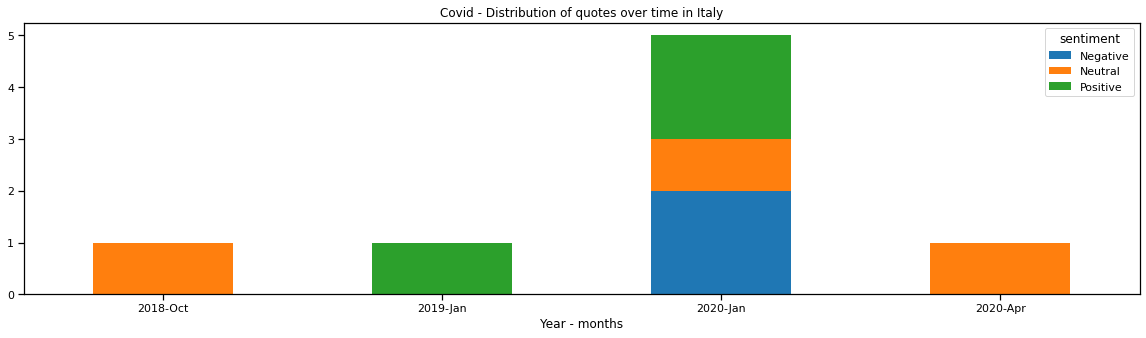

In [464]:
show_time_distribution(quotes, 'Covid', country='Italy')

#### Germany

C:\Users\alexi\AppData\Local\Temp/ipykernel_20624/808219894.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bucket_date'] = dates.apply(lambda x: datetime(x.year, (((x.month - 1) // 3) * 3) + 1, 1))


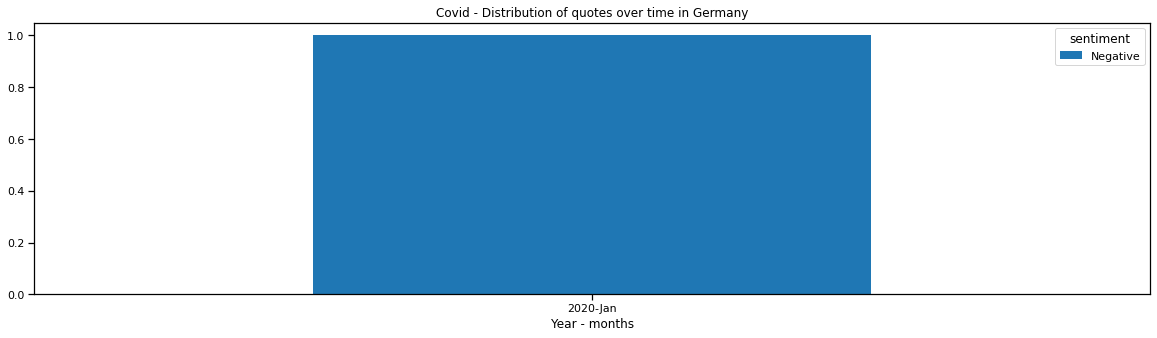

In [465]:
show_time_distribution(quotes, 'Covid', country='Germany')


## Terrorism

### Distribution of number of quotes per party (all countries)

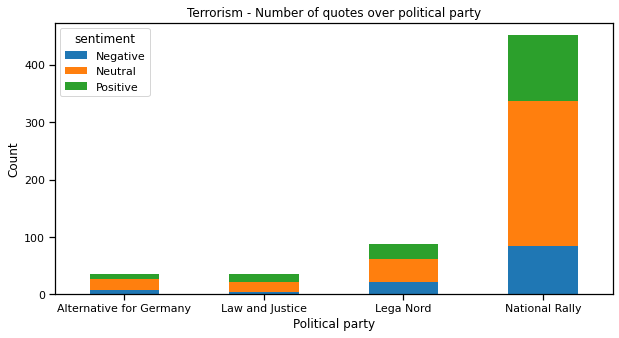

In [466]:
plot_quote_cnt_by_topic(quotes, 'Terrorism')

### Distribution of sentiments within each party over time (per each country)

#### Poland

C:\Users\alexi\AppData\Local\Temp/ipykernel_20624/808219894.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bucket_date'] = dates.apply(lambda x: datetime(x.year, (((x.month - 1) // 3) * 3) + 1, 1))


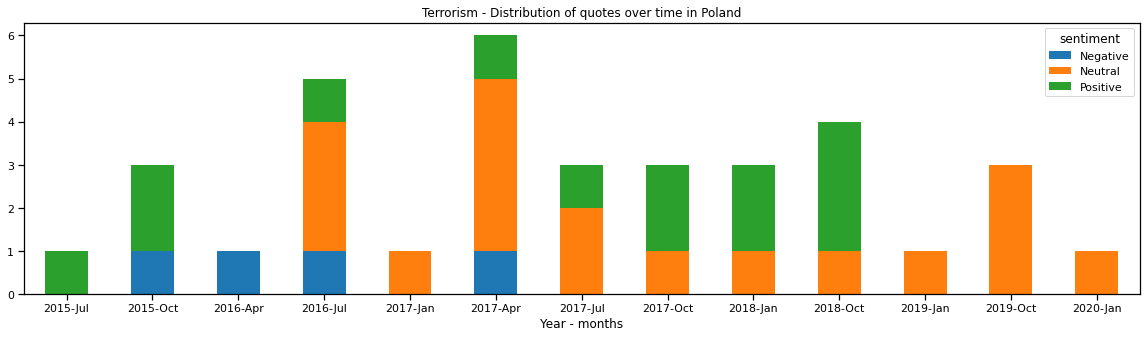

In [467]:
show_time_distribution(quotes, 'Terrorism', country='Poland')

#### France

C:\Users\alexi\AppData\Local\Temp/ipykernel_20624/808219894.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bucket_date'] = dates.apply(lambda x: datetime(x.year, (((x.month - 1) // 3) * 3) + 1, 1))


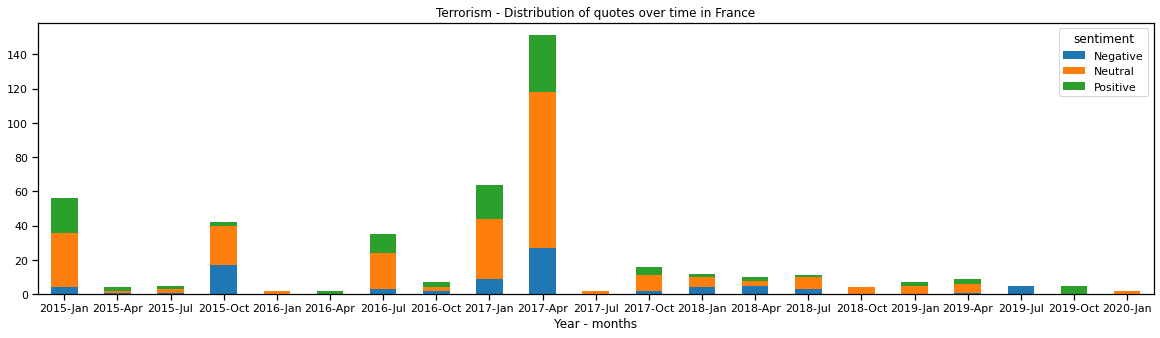

In [468]:
show_time_distribution(quotes, 'Terrorism', country='France')

#### Italy

C:\Users\alexi\AppData\Local\Temp/ipykernel_20624/808219894.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bucket_date'] = dates.apply(lambda x: datetime(x.year, (((x.month - 1) // 3) * 3) + 1, 1))


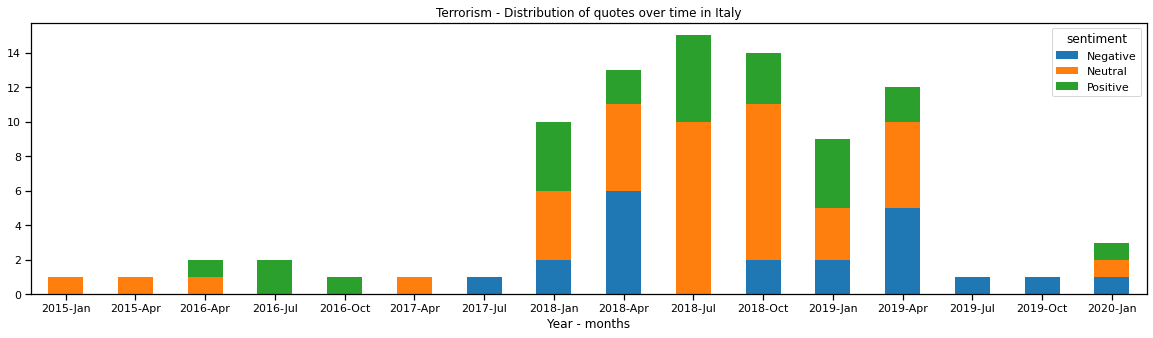

In [469]:
show_time_distribution(quotes, 'Terrorism', country='Italy')

#### Germany

C:\Users\alexi\AppData\Local\Temp/ipykernel_20624/808219894.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bucket_date'] = dates.apply(lambda x: datetime(x.year, (((x.month - 1) // 3) * 3) + 1, 1))


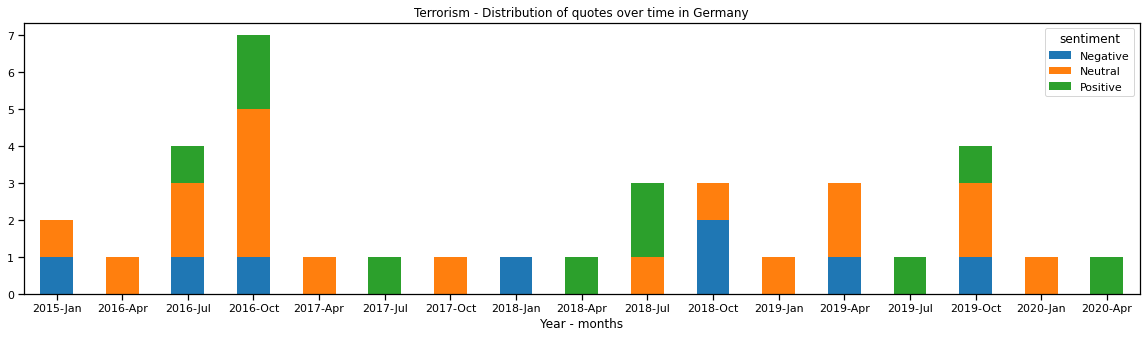

In [470]:
show_time_distribution(quotes, 'Terrorism', country='Germany')


## Climate change

### Distribution of number of quotes per party (all countries)

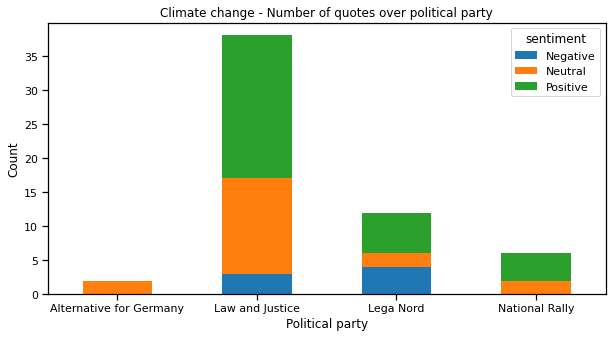

In [471]:
plot_quote_cnt_by_topic(quotes, 'Climate change')

### Distribution of sentiments within each party over time (per each country)

#### Poland

C:\Users\alexi\AppData\Local\Temp/ipykernel_20624/808219894.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bucket_date'] = dates.apply(lambda x: datetime(x.year, (((x.month - 1) // 3) * 3) + 1, 1))


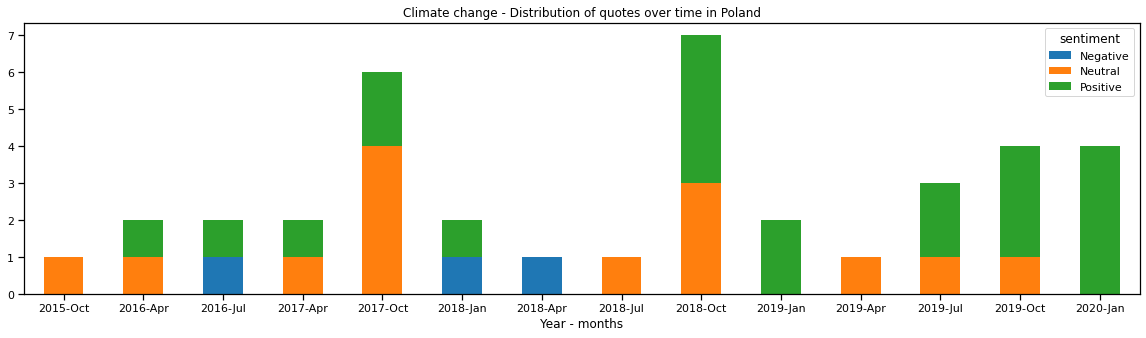

In [472]:
show_time_distribution(quotes, 'Climate change', country='Poland')

#### France

C:\Users\alexi\AppData\Local\Temp/ipykernel_20624/808219894.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bucket_date'] = dates.apply(lambda x: datetime(x.year, (((x.month - 1) // 3) * 3) + 1, 1))


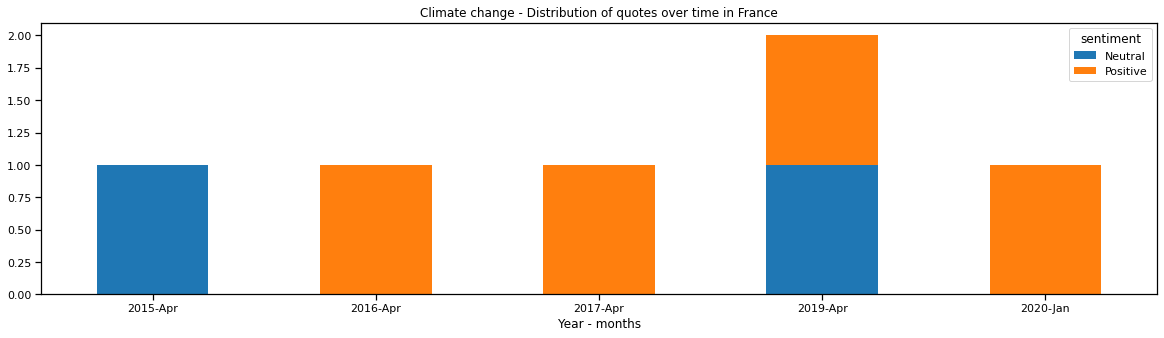

In [473]:
show_time_distribution(quotes, 'Climate change', country='France')

#### Italy

C:\Users\alexi\AppData\Local\Temp/ipykernel_20624/808219894.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bucket_date'] = dates.apply(lambda x: datetime(x.year, (((x.month - 1) // 3) * 3) + 1, 1))


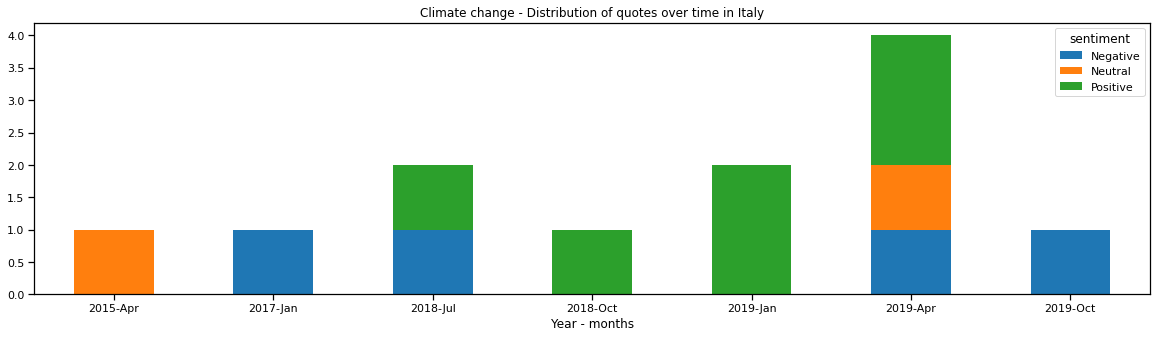

In [474]:
show_time_distribution(quotes, 'Climate change', country='Italy')

#### Germany

C:\Users\alexi\AppData\Local\Temp/ipykernel_20624/808219894.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bucket_date'] = dates.apply(lambda x: datetime(x.year, (((x.month - 1) // 3) * 3) + 1, 1))


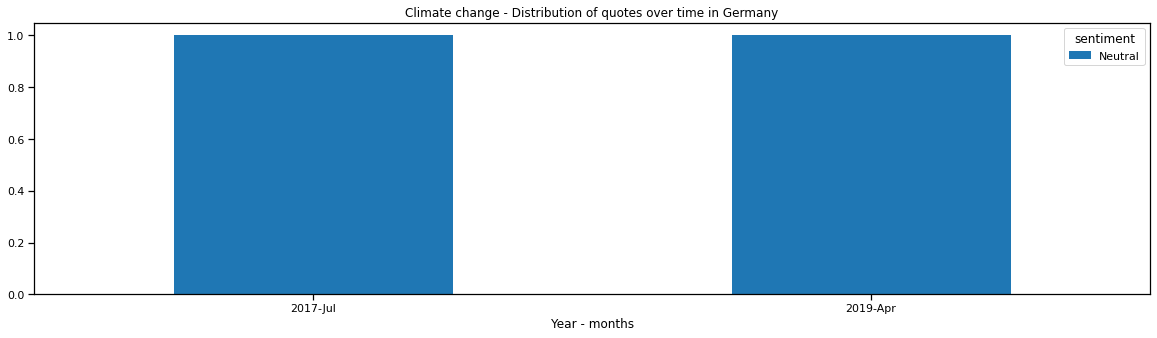

In [475]:
show_time_distribution(quotes, 'Climate change', country='Germany')


## Israeli palestinian

### Distribution of number of quotes per party (all countries)

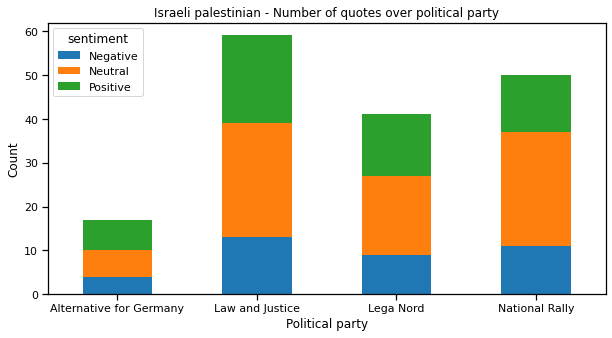

In [476]:
plot_quote_cnt_by_topic(quotes, 'Israeli palestinian')

### Distribution of sentiments within each party over time (per each country)

#### Poland

C:\Users\alexi\AppData\Local\Temp/ipykernel_20624/808219894.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bucket_date'] = dates.apply(lambda x: datetime(x.year, (((x.month - 1) // 3) * 3) + 1, 1))


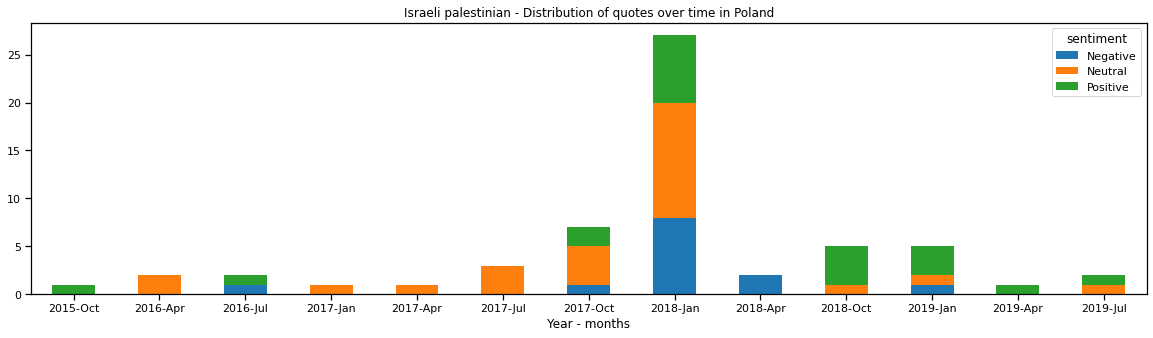

In [477]:
show_time_distribution(quotes, 'Israeli palestinian', country='Poland')

#### France

C:\Users\alexi\AppData\Local\Temp/ipykernel_20624/808219894.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bucket_date'] = dates.apply(lambda x: datetime(x.year, (((x.month - 1) // 3) * 3) + 1, 1))


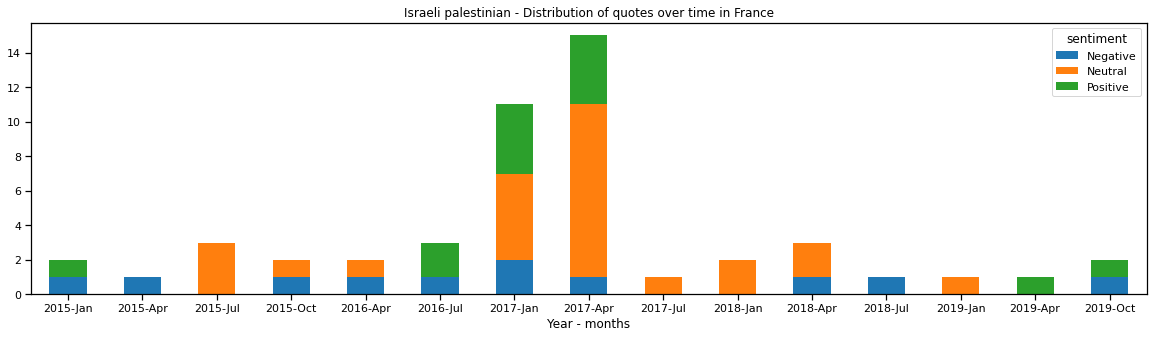

In [478]:
show_time_distribution(quotes, 'Israeli palestinian', country='France')

#### Italy

C:\Users\alexi\AppData\Local\Temp/ipykernel_20624/808219894.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bucket_date'] = dates.apply(lambda x: datetime(x.year, (((x.month - 1) // 3) * 3) + 1, 1))


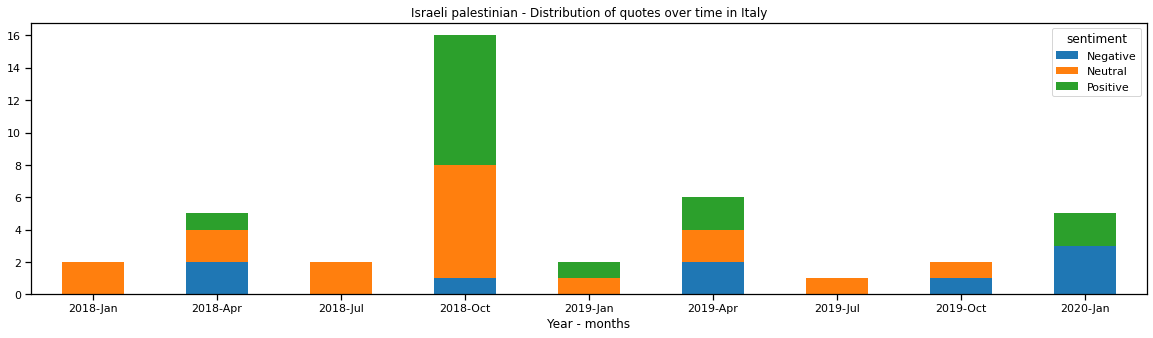

In [479]:
show_time_distribution(quotes, 'Israeli palestinian', country='Italy')

#### Germany

C:\Users\alexi\AppData\Local\Temp/ipykernel_20624/808219894.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bucket_date'] = dates.apply(lambda x: datetime(x.year, (((x.month - 1) // 3) * 3) + 1, 1))


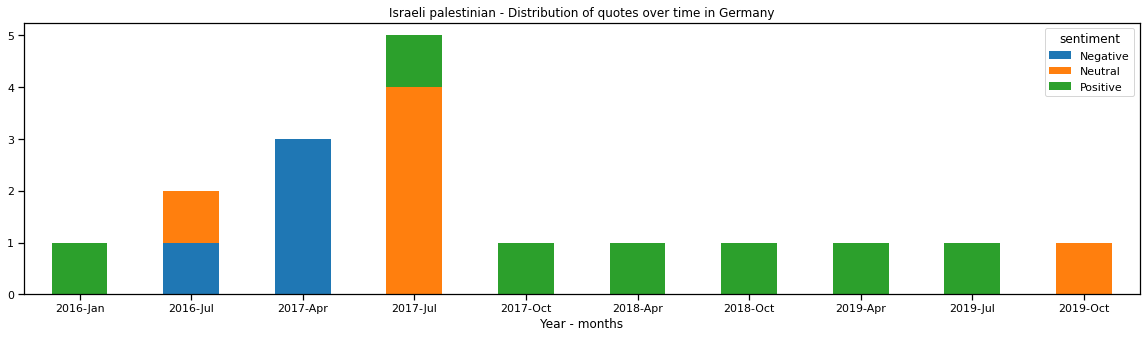

In [480]:
show_time_distribution(quotes, 'Israeli palestinian', country='Germany')